In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
images_a_path = '../soybean-data/Soybean_seed_counting/images_a'
images_b_path = '../soybean-data/Soybean_seed_counting/images_b'
labels_a_path  ='../soybean-data/Soybean_seed_counting/labels_a'
labels_b_path  ='../soybean-data/Soybean_seed_counting/labels_b'

In [6]:
from pathlib import Path

In [7]:
pa = Path(images_a_path)
pb = Path(images_b_path)

In [8]:
res_list = []
file_name_list = []
label_list = []
for child in pa.glob('*.png'):
    filepath = str(child.resolve())
    res_list.append(filepath)

    filename = child.stem
    file_name_list.append(filename)

    label_path = filepath.replace('images_a', 'labels_a').replace('.png', '.txt')
    label_list.append(label_path)

In [9]:
res_list

['/home/ddgi/ubuntu_ddgi/soybean_heatmap_detection/soybean-data/Soybean_seed_counting/images_a/L11E_DSC04928_a_3_L11E_a_3.png',
 '/home/ddgi/ubuntu_ddgi/soybean_heatmap_detection/soybean-data/Soybean_seed_counting/images_a/G19W-G18W_DSC04790_a_5_G18W_a_5.png',
 '/home/ddgi/ubuntu_ddgi/soybean_heatmap_detection/soybean-data/Soybean_seed_counting/images_a/L11E_DSC04926_a_5_L11E_a_5.png',
 '/home/ddgi/ubuntu_ddgi/soybean_heatmap_detection/soybean-data/Soybean_seed_counting/images_a/H22W_DSC04822_a_4_H22W_a_4.png',
 '/home/ddgi/ubuntu_ddgi/soybean_heatmap_detection/soybean-data/Soybean_seed_counting/images_a/J24E_DSC04843_a_1_J24E_a_1.png',
 '/home/ddgi/ubuntu_ddgi/soybean_heatmap_detection/soybean-data/Soybean_seed_counting/images_a/K22W-K23W_DSC04887_a_2_K23W_a_2.png',
 '/home/ddgi/ubuntu_ddgi/soybean_heatmap_detection/soybean-data/Soybean_seed_counting/images_a/G19W-G18W_DSC04787_a_4_G18W_a_4.png',
 '/home/ddgi/ubuntu_ddgi/soybean_heatmap_detection/soybean-data/Soybean_seed_counting/ima

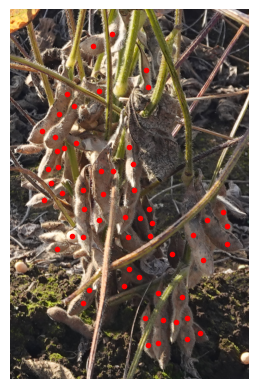

In [10]:
import imageio.v3 as iio
import ast
idx = 1
img = iio.imread(res_list[idx])
# plt.imshow(img)
# plt.plot(1, 1, marker='o', color='r', ls='')
h, w, _ = img.shape
with open(label_list[idx], 'r') as f:
    coords = [ast.literal_eval(line[:-1]) for line in f]

coords_np = np.array(coords)
coords_round = np.trunc(coords_np).astype(np.int32)
x = coords_round[:, 0]
y = coords_round[:, 1]

plt.imshow(img)
plt.axis('off')
plt.plot(x, y, marker='.', color='r', ls='')

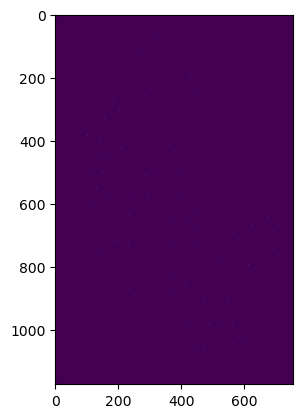

In [11]:
mask = np.zeros_like(img)[... ,0]
mask[y, x] = 1
plt.imshow(mask)
# mask[coords_np[0]]

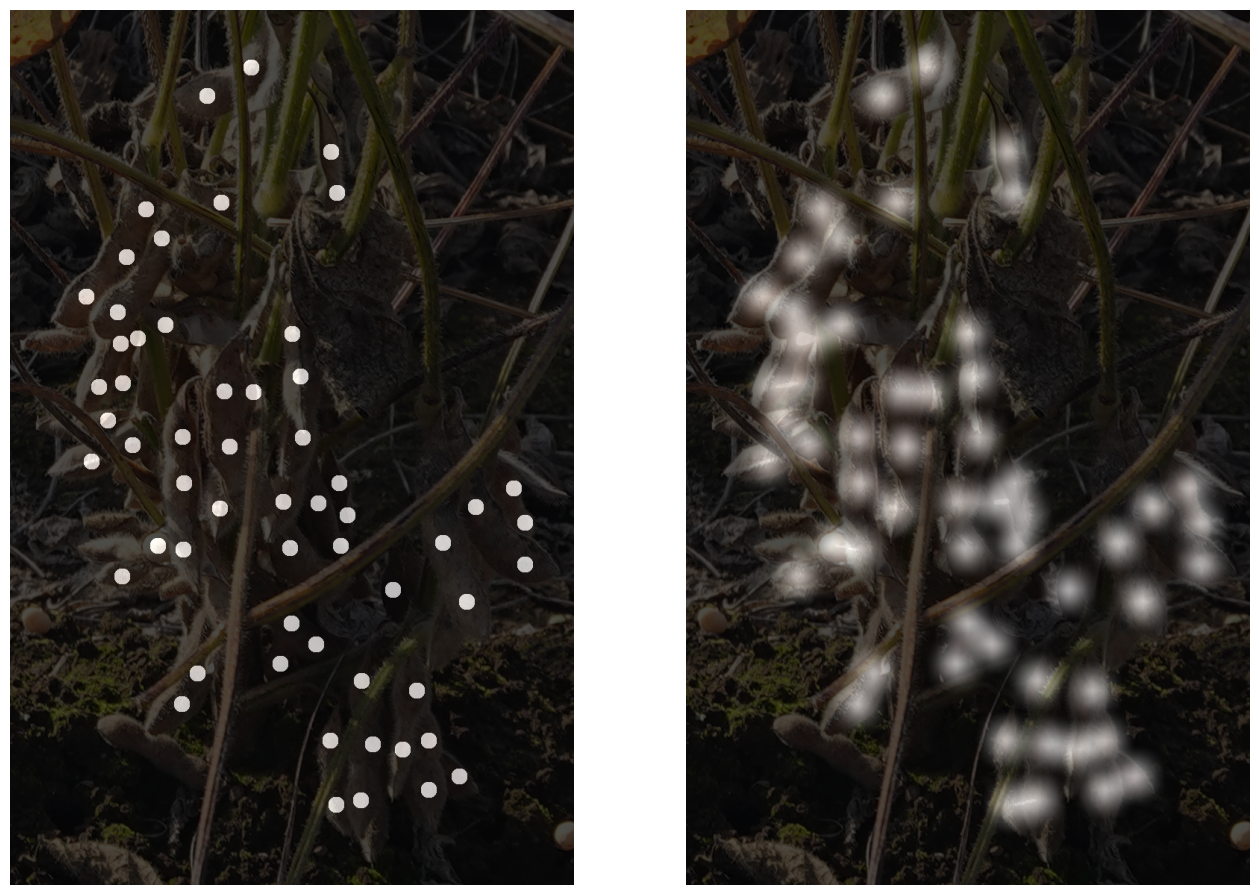

In [22]:

import skimage
from skimage import filters
from skimage.morphology import square, ellipse
import matplotlib as mpl

solid = skimage.morphology.dilation(mask, ellipse(20,20))
dot = skimage.morphology.dilation(mask, ellipse(10,10))
# rst = filters.median(rst)
rst = filters.gaussian(solid,sigma=20, mode='nearest',preserve_range=True, truncate=1)
rst[rst>0.9] = 1
# print(np.unique(rst))
alpha = 0.3
fig = plt.figure(figsize=(16, 12))

ax = plt.subplot(121)
ax.set_axis_off()
raw  = alpha*img/255 + (1-alpha) * dot[..., None] * np.array([1, 1, 1])
ax.imshow(raw)
fused = alpha*img/255 + (1-alpha) * rst[..., None] * np.array([1, 1, 1])
ax = plt.subplot(122)
ax.set_axis_off()
ax.imshow(fused)
# plt.show()

In [13]:
from skimage import measure

In [11]:
img_2x = measure.block_reduce(img, (2,2,1), np.mean).astype(np.uint8)
img_4x = measure.block_reduce(img, (4,4,1), np.mean).astype(np.uint8)
img_8x = measure.block_reduce(img, (8,8,1), np.mean).astype(np.uint8)
img_16x = measure.block_reduce(img, (16,16,1), np.mean).astype(np.uint8)
img_32x = measure.block_reduce(img, (32,32,1), np.mean).astype(np.uint8)
img_64x = measure.block_reduce(img, (64,64,1), np.mean).astype(np.uint8)

In [12]:
mask_2x = measure.block_reduce(mask, (2,2), np.max)
mask_4x = measure.block_reduce(mask, (4,4), np.max)
mask_8x = measure.block_reduce(mask, (8,8), np.max)
mask_16x = measure.block_reduce(mask, (16,16), np.max)
mask_32x = measure.block_reduce(mask, (32,32), np.max)
mask_64x = measure.block_reduce(mask, (64,64), np.max)

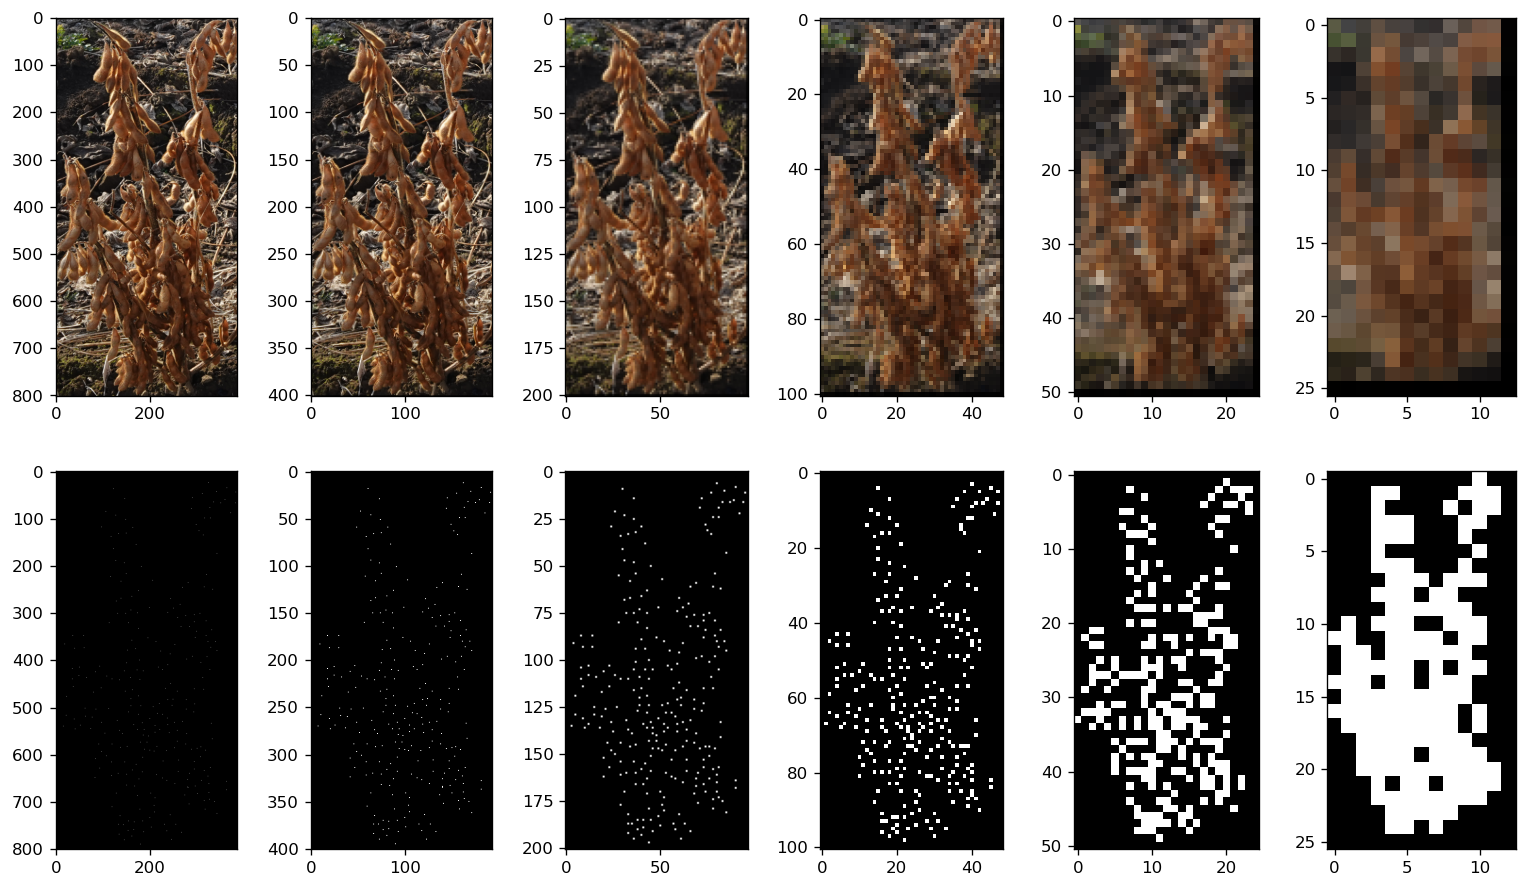

In [13]:
fig = plt.figure(figsize=(16, 9), dpi=120)

ax1 = plt.subplot(261)
ax1.imshow(img_2x)

ax1 = plt.subplot(262)
ax1.imshow(img_4x)

ax1 = plt.subplot(263)
ax1.imshow(img_8x)

ax1 = plt.subplot(264)
ax1.imshow(img_16x)

ax1 = plt.subplot(265)
ax1.imshow(img_32x)

ax1 = plt.subplot(266)
ax1.imshow(img_64x)


ax1 = plt.subplot(267)
ax1.imshow(mask_2x, cmap='gray')

ax1 = plt.subplot(268)
ax1.imshow(mask_4x, cmap='gray')

ax1 = plt.subplot(269)
ax1.imshow(mask_8x, cmap='gray')

ax1 = plt.subplot(2,6,10)
ax1.imshow(mask_16x, cmap='gray')

ax1 = plt.subplot(2,6,11)
ax1.imshow(mask_32x, cmap='gray')

ax1 = plt.subplot(2,6,12)
ax1.imshow(mask_64x, cmap='gray')

In [14]:
import timm
import torch
import torchvision.transforms as T

/home/ddgi/miniconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
model_name = "convnext_xlarge_in22k"
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print("device = ", device)
# create a ConvNeXt model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/convnext.py
# model = timm.create_model(model_name, pretrained=True, features_only=True).to(device)

device =  cpu


In [16]:
# Define transforms for test
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

NORMALIZE_MEAN = IMAGENET_DEFAULT_MEAN
NORMALIZE_STD = IMAGENET_DEFAULT_STD
SIZE = 256

# Here we resize smaller edge to 256, no center cropping
transforms = [
              T.Resize((256, 256), interpolation=T.InterpolationMode.BICUBIC),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

In [17]:
from PIL import Image
img_pil = Image.fromarray(img)
img_tensor = transforms(img_pil).unsqueeze(0).to(device)

In [18]:
img_tensor.shape

torch.Size([1, 3, 256, 256])

In [19]:
import torch.nn as nn
class SoyModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.backbone = timm.create_model(
            model_name, pretrained=True, features_only=True).to(device)
        
        
        self.c1 = nn.Conv2d(2048, 1, kernel_size=3, padding=1, bias=False)
        self.c2 = nn.Conv2d(2048+1, 1, kernel_size=3, padding=1, bias=False)
        self.c3 = nn.Conv2d(1024+1, 1, kernel_size=3, padding=1, bias=False)
        self.c4 = nn.Conv2d(512+1, 1, kernel_size=3, padding=1, bias=False)
        self.c5 = nn.Conv2d(256+1, 1, kernel_size=3, padding=1, bias=False)
        # self.

    def upsample_conv(self, x, conv):
        return conv(nn.UpsamplingNearest2d(scale_factor=2)(x))

    def forward(self, x):
        act = nn.Sigmoid()
        x1 ,x2, x3, x4 = self.backbone(x)
        
        bx4 = self.c1(x4)
        bx3 = self.upsample_conv(torch.cat((bx4, x4), 1), self.c2)
        bx2 = self.upsample_conv(torch.cat((bx3, x3), 1), self.c3)
        bx1 = self.upsample_conv(torch.cat((bx2, x2), 1), self.c4)
        bx1 = self.c5(torch.cat((bx1, x1), 1))

        return act(bx1), act(bx2), act(bx3), act(bx4)


In [20]:
test = SoyModel()

/home/ddgi/miniconda3/envs/torch/lib/python3.11/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name convnext_xlarge_in22k to current convnext_xlarge.fb_in22k.
  model = create_fn(


In [21]:
rst = test(img_tensor)

In [22]:
rst[0].shape

torch.Size([1, 1, 64, 64])

In [23]:
np.unique(rst[0][0].detach().permute(1, 2, 0))

array([1.3020901e-04, 5.5134867e-04, 5.6441291e-04, ..., 8.0621660e-01,
       8.5983080e-01, 8.6662358e-01], dtype=float32)